# Plot power spectra

plot output of scripts/2_compute_spectra.py  
  
created: Jan 23, 2023  
modified: April 5, 2023; Feb 16, 2024  
last modified: Mar 5, 2024

## Set-up

### Imports

In [3]:
# Imports - standard 
import numpy as np
import matplotlib.pyplot as plt
import os

# Imports - custom
import sys
sys.path.append('../../scripts')
from paths import EXTERNAL_PATH
from info import SESSIONS
from plots import plot_psd_diff, plot_spectra_2conditions
from utils import comp_psd_diff, crop_tfr

In [4]:
# Autoreload
%load_ext autoreload
%autoreload 2

### settings

In [5]:
plt.style.use('../../mpl_styles/default.mplstyle')

### functions

In [6]:
def compute_epoch_psd(tfr, time, duration=0.3):
    """
    Split the TFR into pre- and post-stimulus epochs.
    
    """
    
    psd_pre = np.mean(crop_tfr(tfr, time, [-duration, 0])[0], axis=-1)
    psd_post = np.mean(crop_tfr(tfr, time, [0, duration])[0], axis=-1)

    return psd_pre, psd_post


#### examine spectra output for an example file

['spectrogram', 'time', 'freq']
TFR shape: (1024, 128, 500)
Time shape: (500,)
Freq shape: (128,)
Pre-stimulus PSD shape: (1024, 128)
Post-stimulus PSD shape: (1024, 128)


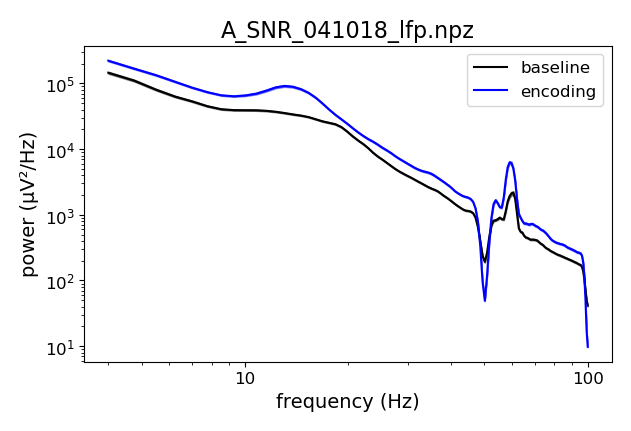

In [8]:
# load example psd and plot
# NOTE: this was used to develop scripts.plotting.plot_spectra.py

# load and unpack
dir_input = f"{EXTERNAL_PATH}/data/lfp/lfp_tfr/sessions"
files = os.listdir(dir_input)
data_in = np.load(f"{dir_input}/{files[0]}")
tfr = data_in['spectrogram']
time = data_in['time']
freq = data_in['freq']

# split pre- and post-stimulus
psd_pre, psd_post = compute_epoch_psd(tfr, time)

# plot spectra
fig, ax = plt.subplots(figsize=(6, 4))
plot_spectra_2conditions(psd_pre, psd_post, freq, ax=ax)
ax.set_title(files[0])

# print info
print(data_in.files)
print(f"TFR shape: {tfr.shape}")
print(f"Time shape: {time.shape}")
print(f"Freq shape: {freq.shape}")
print(f"Pre-stimulus PSD shape: {psd_pre.shape}")
print(f"Post-stimulus PSD shape: {psd_post.shape}")

In [9]:
# # plot mean psd for each array on a single figure
# # NOTE: this plot is difficult to read

# for i_session in range(len(SESSIONS)):
#     print(f"Plotting: \t{SESSIONS[i_session]}")

#     # create figure
#     fig, axes = plt.subplots(7, 2, figsize=(10, 21), constrained_layout=True)
   
#     # loop over arrays
#     for ii, ax in enumerate(axes.flatten()):
#         i_array = ii+1
#         nps_idx = (i_array+1) // 2
        
#         # load data
#         fname_in = f"{EXTERNAL_PATH}/data/lfp/lfp_tfr/{SESSIONS[i_session]}/NSP{nps_idx}_array{i_array}_LFP.npz"
#         data_in = np.load(fname_in)
#         tfr = data_in['tfr']
#         time = data_in['time']
#         freq = data_in['freq']
#         psd_pre = np.mean(tfr[:,:,time<0], axis=-1)
#         psd_post = np.mean(tfr[:,:,time>0], axis=-1)
        
#         # plot
#         ax.set_title(f"Array {i_array}")
#         plot_spectra_2conditions(psd_pre, psd_post, freq, ax=ax)

#     # save
#     fname_out = f"{dir_figs}/psd_arrays_{SESSIONS[i_session]}.png"
#     plt.savefig(fname_out, transparent=False)
#     plt.close()

Plotting: 	A_SNR_041018


c:\Users\micha\projects\v1_v4_1024_elec\.venv\lib\site-packages\specparam\plts\style.py:179: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


Plotting: 	A_SNR_140819
Plotting: 	L_SNR_250717


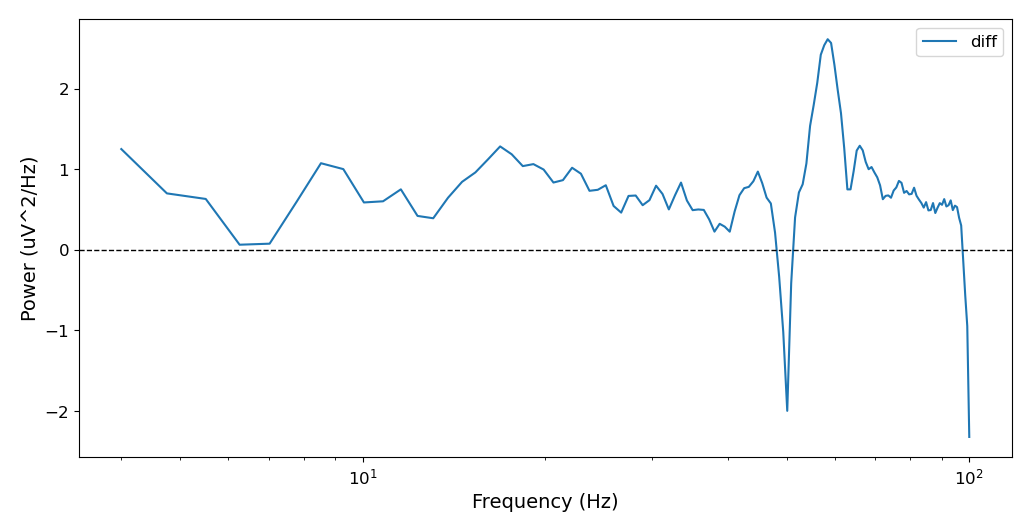

In [20]:
# compute differnce of log psd and plot

# compute log psd
log_psd_pre = np.log(psd_pre)
log_psd_post = np.log(psd_post)

# compute difference
log_psd_diff = log_psd_post - log_psd_pre

# plot log psd
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(freq, np.mean(log_psd_diff, axis=0), label='diff')

# label
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power (uV^2/Hz)')
# ax.set_title(f"PSD of array {i_array}")
ax.legend()

# annotate power=0
ax.axhline(0, color='k', linestyle='--', linewidth=1)

# scale x-axis logarithmically
ax.set(xscale="log")

plt.show()

In [8]:
# these have been developed into functions within the modules scripts.utils.py and scripts.plots.py

# def comp_psd_diff(psd_pre, psd_post):
#     """
#     Compute the difference of log psd.
    
#     Parameters
#     ----------
#     psd_pre : array
#         Array of pre-stimulus psd.
#     psd_post : array
#         Array of post-stimulus psd.

#     Returns
#     -------
#     log_psd_diff : array
#         Array of log psd difference.
    
#     """
    
#     # compute log psd
#     log_psd_pre = np.log(psd_pre)
#     log_psd_post = np.log(psd_post)
    
#     # compute difference
#     log_psd_diff = log_psd_post - log_psd_pre

#     return log_psd_diff

# def plot_psd_diff(freq, psd_diff):
#     """ Plot spectra (or spectral difference) in semi-log space."""
#     # plot psd
#     fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#     ax.plot(freq, psd_diff.T, color='grey')

#     # plot mean
#     ax.plot(freq, psd_diff.mean(axis=0), color='k', linewidth=3)

#     # label
#     ax.set_xlabel('Frequency (Hz)')
#     ax.set_ylabel('Power (uV^2/Hz)')
#     ax.set_title(f"Power spectrum difference")

#     # annotate power=0
#     ax.axhline(0, color='r', linestyle='--', linewidth=3)

#     # scale x-axis logarithmically
#     ax.set(xscale="log");

#     return fig, ax

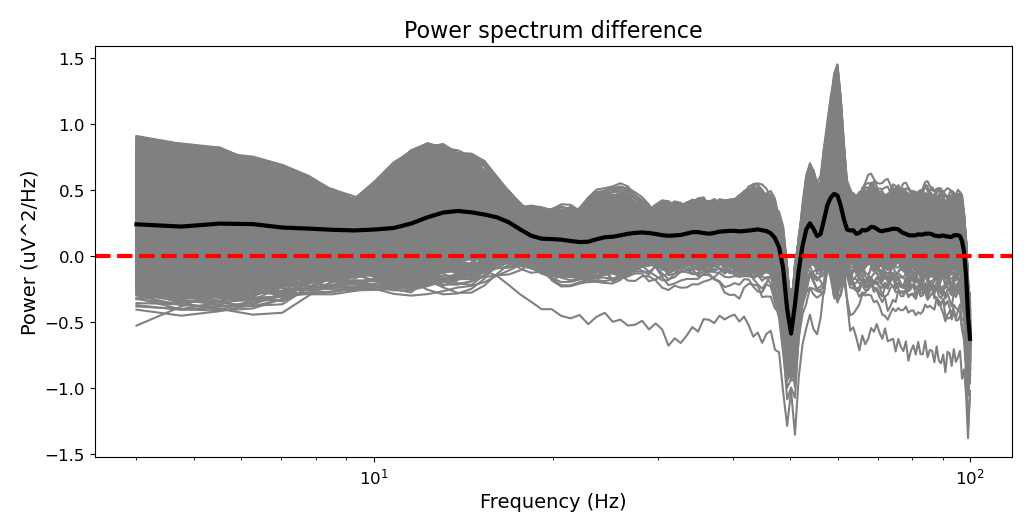

In [26]:
# Test functions on example data - compute and plot log psd difference

# load psd results
dir_input = f"{EXTERNAL_PATH}/data/lfp/lfp_psd"
session = SESSIONS[0]
data_pre = np.load(f"{dir_input}/{session}_lfp_pre.npz")
data_post = np.load(f"{dir_input}/{session}_lfp_post.npz")

# compute log psd difference
psd_diff = comp_psd_diff(data_pre['spectra'], data_post['spectra'])

# plot
plot_psd_diff(freq, psd_diff)
